<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Capstone Part 10:** Exploratory Data Analysis


#### Student Author: Abigail Hedden

## Objectives


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Set-up


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# display all columns
pd.set_option('display.max_columns', None)

# preview
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

## Handle Missing Data
Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [27]:
df.shape

(65437, 114)

In [28]:
# Step 1: Identify and manage missing values
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
print('number of null rows')
print(df[critical_cols].isnull().sum())
# there are no null employment values

# the number of rows where JobSat is missing is over half of the dataset
# why is it missing?

# create a mask where JobSat is null
missing_mask = df['JobSat'].isnull()
print('')
print(df[missing_mask].Employment.value_counts())
print(df[missing_mask].YearsCodePro.describe())

# examine the types of employment associated with present and missing JobSat data
print('')
print("Employment distribution (JobSat missing):")
print(df.loc[missing_mask, 'Employment'].value_counts(normalize=True).head(10))
# most missing JobSat data came from people who are students, part-time workers, or unemployed
print('')
print("\nEmployment distribution (JobSat present):")
print(df.loc[~missing_mask, 'Employment'].value_counts(normalize=True).head(10))
# most present JobSat data came from people who are employed full time (77%) 

# insight: People who skipped the JobSat question are disproportionately students, unemployed, or not full-time.
# dropping all null rows would bias the analyses heavily toward full-time employees.
# solution: replace null values with "missing", to easily use in later analyses

df_nonull = df.copy()

df_nonull['JobSat'] = df_nonull['JobSat'].fillna('Missing')

# fill missing RemoteWork data with "Unknown"
df_nonull['RemoteWork'] = df_nonull['RemoteWork'].fillna('Unknown')

# ensure no null values
print('')
print(df_nonull[critical_cols].isnull().sum())

number of null rows
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Employed, full-time                                                                                                                                                              16504
Student, full-time                                                                                                                                                                4709
Independent contractor, freelancer, or self-employed                                                                                                                              3601
Not employed, but looking for work                                                                                                                                                2340
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                      

In [29]:
# confirm preserved rows
print(df.shape)
print(df_nonull.shape)

(65437, 114)
(65437, 114)


## Analyses

### Analysis of Experience and Job Satisfaction


* Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). 
* Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.


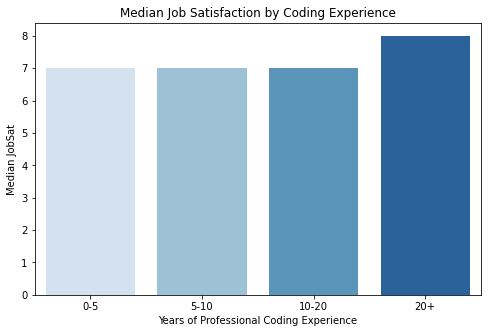

In [51]:
### create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# calculate the median `JobSat` for each range
job_sat_by_exp = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# visualize the relationship using a bar plot or similar visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=job_sat_by_exp, x='ExperienceRange', y='JobSat', palette='Blues')
plt.title('Median Job Satisfaction by Coding Experience')
plt.ylabel('Median JobSat')
plt.xlabel('Years of Professional Coding Experience')
plt.show()

# people with 20+ years of coding experience have the highest median level of job satisfaction

### Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


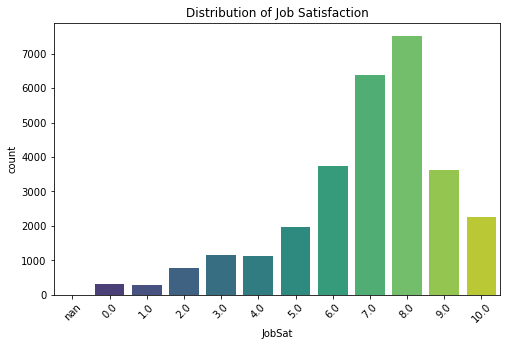

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', order=sorted(df['JobSat'].unique()), palette='viridis')
plt.title('Distribution of Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

### Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


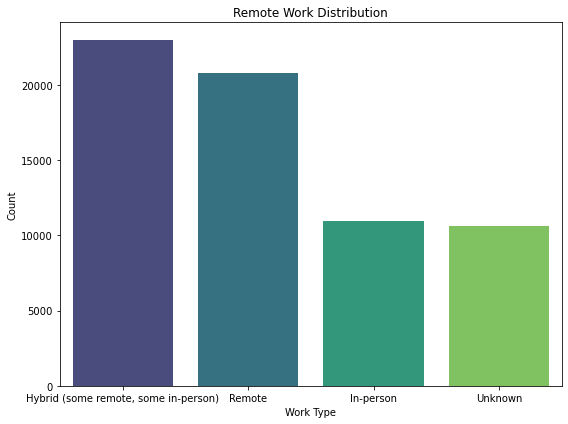

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                             0.442807   
Employed, full-time;Employed, part-time                                         0.400943   
Employed, full-time;Independent contractor, fre...                              0.373911   
Employed, full-time;Independent contractor, fre...                              0.434783   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                              0.500000   
Student, full-time;Not employed, but looking fo...                              0.400000   
Student, full-time;Not employed, but looking fo...                              

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_nonull, x='RemoteWork', order=df_nonull['RemoteWork'].value_counts().index, palette='viridis')
plt.title('Remote Work Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# cross-tabulation
remote_job_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index')
print(remote_job_crosstab)

### Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


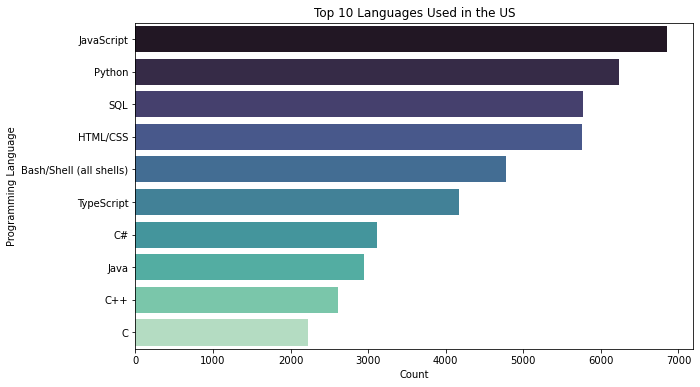

         Country LanguageHaveWorkedWith  Count
22   Afghanistan             JavaScript     25
36   Afghanistan                 Python     25
19   Afghanistan               HTML/CSS     24
40   Afghanistan                    SQL     21
32   Afghanistan                    PHP     15
73       Albania                    SQL     28
60       Albania             JavaScript     26
57       Albania               HTML/CSS     25
59       Albania                   Java     16
67       Albania                    PHP     16
94       Algeria             JavaScript     53
92       Algeria               HTML/CSS     52
103      Algeria                 Python     37
106      Algeria                    SQL     35
108      Algeria             TypeScript     32
128      Andorra                 Python      8
131      Andorra                    SQL      8
120      Andorra               HTML/CSS      7
122      Andorra             JavaScript      7
134      Andorra             TypeScript      7


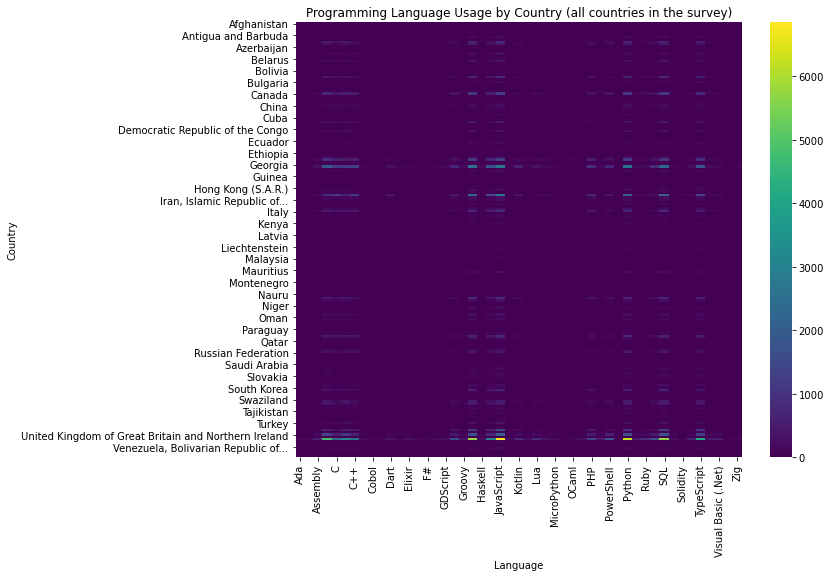

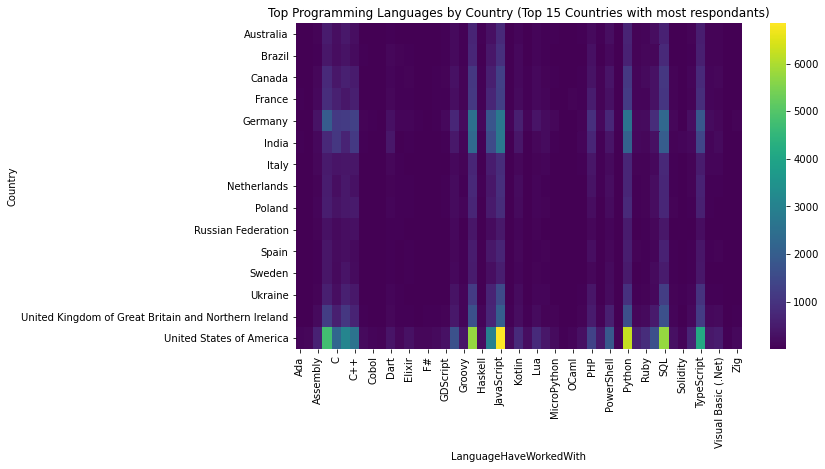

In [69]:
df_lang = df_nonull[['Country', 'LanguageHaveWorkedWith']].dropna()
# split languages into lists
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
# explode lists into rows (.explode() takes a list in a single cell and turns each item into a separate row)
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# (exploratory) top languages by country (example for US)
top_us = df_lang[df_lang['Country'] == 'United States of America']['LanguageHaveWorkedWith'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_us.values, y=top_us.index, palette='mako')
plt.title('Top 10 Languages Used in the US')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()

# understand top languages in each unique region
# group by Country and Language and count
lang_counts = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# for each country, get top 5 languages
top_5 = 5

# create empty df
top_langs_by_country = []

# loop through unique regions and find top 5 languages, sotring results in new df
for country in lang_counts['Country'].unique():
    country_df = lang_counts[lang_counts['Country']==country]
    top_langs = country_df.nlargest(top_5, 'Count')
    top_langs_by_country.append(top_langs)

top_langs_by_country_df = pd.concat(top_langs_by_country)

print(top_langs_by_country_df.head(20))


heatmap_df = lang_counts.pivot_table(
    index='Country',
    columns='LanguageHaveWorkedWith',
    values='Count',
    fill_value=0
)

# plot top 5 languages of every unique region
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap='viridis')
plt.title("Programming Language Usage by Country (all countries in the survey)")
plt.xlabel("Language")
plt.ylabel("Country")
plt.show()

### (for easier visualization) plot the top 5 languages of the 20 countries of responses
# count total responses per country
country_counts = df['Country'].value_counts()

# top 20 countries
top_countries = country_counts.head(15).index

lang_counts_top = lang_counts[lang_counts['Country'].isin(top_countries)]
heatmap_df = lang_counts_top.pivot_table(
    index='Country',
    columns='LanguageHaveWorkedWith',
    values='Count',
    fill_value=0
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=False, fmt='d', cmap='viridis')
plt.title("Top Programming Languages by Country (Top 15 Countries with most respondants)")
plt.show()

### Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [74]:
df_nonull.YearsCodePro

0        NaN
1         17
2         27
3        NaN
4        NaN
        ... 
65432      3
65433    NaN
65434      5
65435      2
65436    NaN
Name: YearsCodePro, Length: 65437, dtype: object

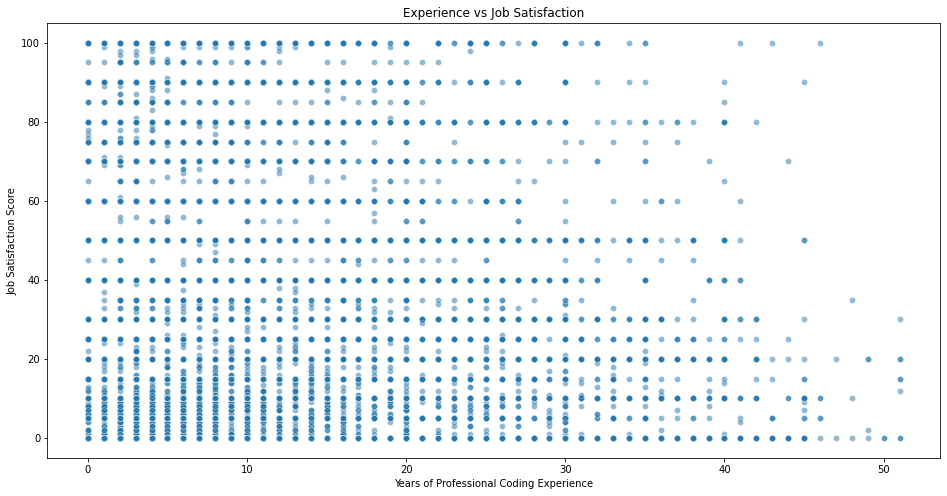

In [76]:
# replace special cases to keep experience as a continuous variable for scatterplot
df_nonull['YearsCodePro_num'] = df_nonull['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
# make numeric
df_nonull['JobSatPoints_1'] = pd.to_numeric(df_nonull['JobSatPoints_1'], errors='coerce')
df_nonull['YearsCodePro_num'] = pd.to_numeric(df_nonull['YearsCodePro_num'], errors='coerce')


plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_nonull,
    x='YearsCodePro_num',
    y='JobSatPoints_1',
    alpha=0.5
)
plt.title('Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

# seemingly no relationship

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [86]:
# reduce employment responses with the "most employed" option being taken
def simp_employment(x):
    if pd.isnull(x):
        return 'Other'
    elif 'Employed, full-time' in x:
        return 'Employed full-time'
    elif 'Employed, part-time' in x:
        return 'Employed part-time'
    elif 'Independent contractor' in x:
        return 'Contractor/Self-employed'
    elif 'Student' in x:
        return 'Student'
    elif 'Not employed' in x:
        return 'Unemployed'
    elif 'Retired' in x:
        return 'Retired'
    else:
        return 'Other'

df_nonull['Employment_Simple'] = df_nonull['Employment'].apply(simp_employment)
df_nonull.Employment_Simple

0        Employed full-time
1        Employed full-time
2        Employed full-time
3                   Student
4                   Student
                ...        
65432    Employed full-time
65433    Employed full-time
65434    Employed full-time
65435    Employed full-time
65436               Student
Name: Employment_Simple, Length: 65437, dtype: object

<ipython-input-94-35fc35f9c90c>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


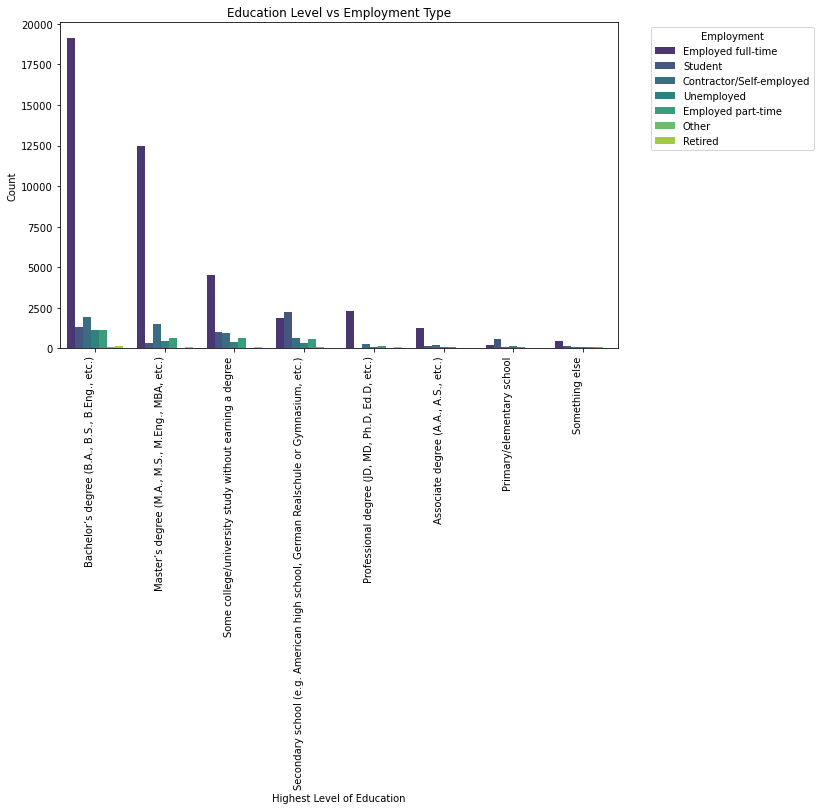

Employment_Simple                                   Contractor/Self-employed  \
EdLevel                                                                        
Associate degree (A.A., A.S., etc.)                                 0.101506   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                        0.078061   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                     0.095134   
Primary/elementary school                                           0.095986   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                      0.092929   
Secondary school (e.g. American high school, Ge...                  0.105990   
Some college/university study without earning a...                  0.124951   
Something else                                                      0.091202   

Employment_Simple                                   Employed full-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_nonull, x='EdLevel', hue='Employment_Simple', palette='viridis', order=df_nonull['EdLevel'].value_counts().index)
plt.title('Education Level vs Employment Type')
plt.xticks(rotation=90, ha='right')
plt.ylabel('Count')
plt.xlabel('Highest Level of Education')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# cross-tab
education_employment_ct = pd.crosstab(df_nonull['EdLevel'], df_nonull['Employment_Simple'], normalize='index')
print(education_employment_ct)

## Save the Cleaned and Analyzed Dataset

In [95]:
df_nonull.to_csv('cleaned_stackoverflow_data.csv', index=False)

Copyright © IBM Corporation. All rights reserved.
